In [ ]:
import sys; sys.path.insert(0,'..')

In [ ]:
import datetime
import glob
import json
import os

import numpy as np
import pandas as pd

In [ ]:
from flight_tables.heathrow_parsing import extract_batch_heathrow
from flight_tables.flight_parsing import ParsedFlights

# About
Analyse dataframe created by `NB03 - Batch Load Heathrow Json Files.ipynb`

Content:
* Unusual Days
* Time of Day
* Destinations
* Bug in Heathrow data assumption.

This notebook is quite rough.

# Load Dataframe

In [ ]:
df = pd.read_pickle('example_flights.pkl')

# Dataframe Preparation
* Drop Duplicates
* Drop Flights which are not the primary Flight ID

In [ ]:
# Delete Duplicates
df.drop_duplicates(inplace=True) 

In [ ]:
#Duplicate Analysis:
#df.loc[df.duplicated()] # Show duplicates
#df.loc[(df.delay_mins==16) & (df.flight_id=='BR068')] # Find specific Duplicates
#assert df.duplicated().any()==False, "Duplicated Entries found in Table."

In [ ]:
# Drop Alternative flight IDs
df = df.loc[df.code_share != 'alt_code']

In [ ]:
# Filter out Cancelled
departed_df = df.loc[df.status=="Departed"]
df = departed_df

In [ ]:
df.head()

# Analysis

### Daily Departures

# Selected Events
* Storm Ciara 9th Feb
* 16th IT Failure

In [ ]:
# Note Storm Ciara 9th Feb
title = "Heathrow Daily Departures"
xlabel = "Date"
ylabel = "Flights per Day"
ax = df.groupby([df['actual_datetime'].dt.date]).count().flight_id.plot(figsize=[18,5])
ax.set(xlabel=xlabel,ylabel=ylabel,title=title);

In [ ]:
# Note how 16th IT Failure gave Delay spike (but not departures)
# Plot the Mean
title = "Heathrow Daily Median Delay"
xlabel = "Date"
ylabel = "Median Delay (mins)"
ax = df.delay_mins.groupby([df['actual_datetime'].dt.date]).median().plot(figsize=[18,5])
ax.set(xlabel=xlabel,ylabel=ylabel,title=title);

In [ ]:
# Note how 16th IT Failure gave Delay spike (but not departures)
# Plot the Median
title = "Heathrow Daily Average Delay"
xlabel = "Date"
ylabel = "Median Delay (mins)"
ax = df.delay_mins.groupby([df['actual_datetime'].dt.date]).mean().plot(figsize=[18,5])
ax.set(xlabel=xlabel,ylabel=ylabel,title=title);

# Destination

In [ ]:
df.destination.mode()

In [ ]:
fri_dub_df = df.loc[(df.scheduled_datetime.dt.dayofweek==4) & (df.destination=='DUB')]

In [ ]:
fri_dub_df.loc[fri_dub_df.flight_id == 'BA836'].delay_mins

# Time of Day

Note: Heathrow flights tend to leave > 20 mins late...

In [ ]:
df.groupby([df.scheduled_datetime.dt.hour, df.scheduled_datetime.dt.minute]).mean().delay_mins.plot(figsize=[18,5])

# Bug 
Heathrow departure date assumption:
* The departure time doesn't have a date and we guess it
* This can give a false answer when actual departure is after midnight but scheduled departure is before midnight. 

In [ ]:
# Filter to spot invalid date assumptions
df.loc[df.delay_mins<-1000]

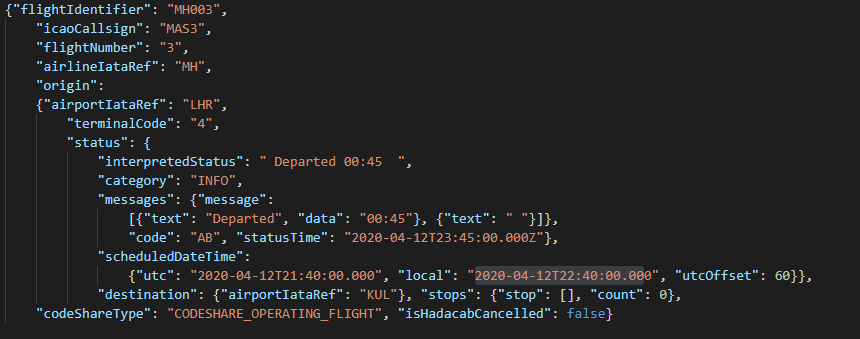